In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [38]:
pd.set_option('display.max_columns',100)

In [39]:
path=r'C:\Users\berid\OneDrive\Desktop\RC September.xlsx'

In [40]:
df_zooplus=pd.read_excel(path,'ZOOPLUS')
df_RC=pd.read_excel(path,'Picks-up PGS')
df_RC_in=pd.read_excel(path,'Data RC')

# Clean data 

In [41]:
df_zooplus.columns=df_zooplus.columns.str.strip()
df_zooplus['Date2']=pd.to_datetime(df_zooplus['Date2'])
df_zooplus=df_zooplus.sort_values('Date2')

grouped1=df_zooplus.groupby(['Month','FC'])['Euro pallet out'].sum().reset_index()

In [42]:
df_RC.columns=df_RC.columns.str.strip()

grouped2=df_RC.groupby(['Month','FC'])['EPAL Collected'].sum().reset_index()

In [43]:
df_RC_in.columns=df_RC_in.columns.str.strip()

# Euro pallet out 

In [44]:
merged=grouped1.merge(grouped2,how='outer',left_on=['Month','FC'],right_on=['Month','FC'])

In [45]:
month_num=[]
for i in merged['Month']:
    if i=="January":
        month_num.append(1)
    elif i=="February":
        month_num.append(2)
    elif i=="March":
        month_num.append(3)
    elif i=="April":
        month_num.append(4)
    elif i=="May":
        month_num.append(5)
    elif i=="June":
        month_num.append(6)
    elif i=="July":
        month_num.append(7)
    elif i=="August":
        month_num.append(8)
    elif i=='September':
        month_num.append(9)
    else:
        None
merged['month_num']=month_num


In [46]:
merged=merged.sort_values('month_num')

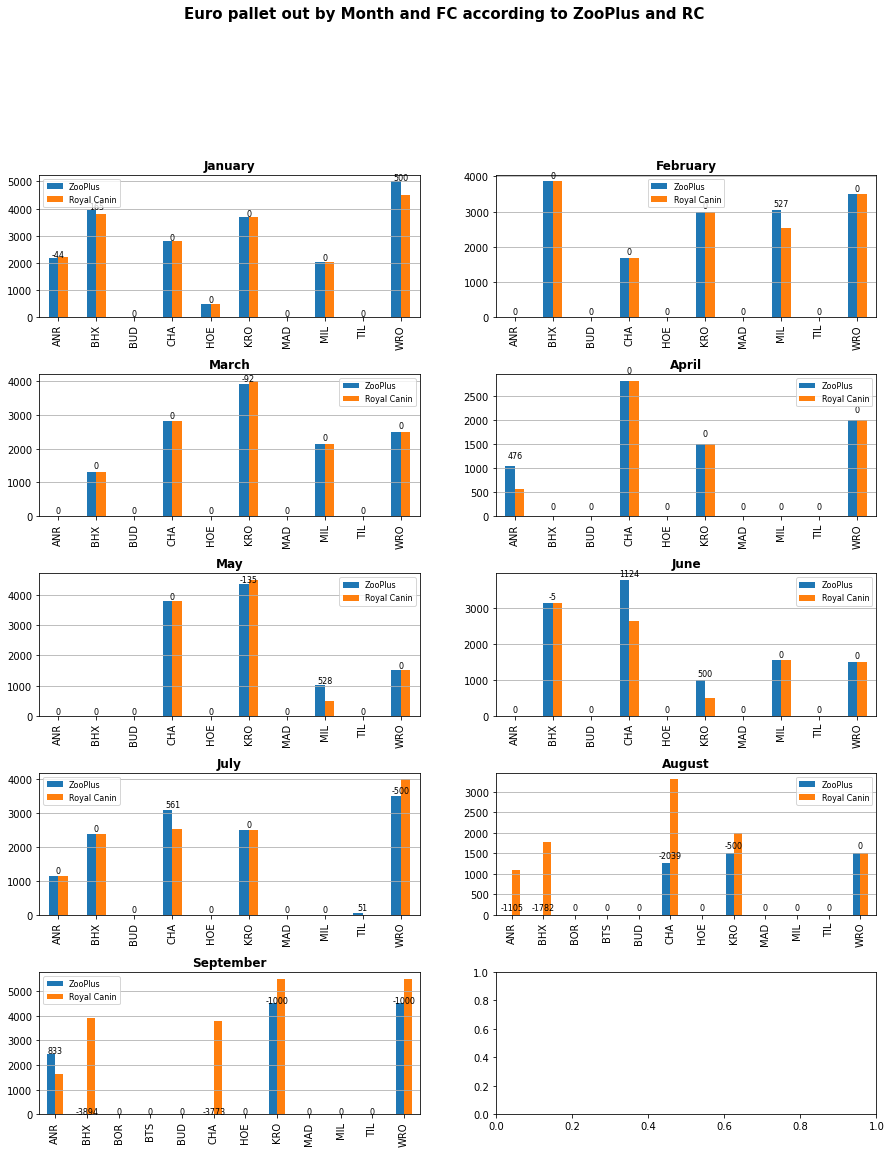

In [47]:
def value_labels(x,y):
    for i in range(len(y)):
        ax.text(i,x.iloc[i]+150,y.iloc[i],size=8,ha='center',va='top')


months=merged['Month'].unique()
fig,axes=plt.subplots(5,2,figsize=(15,18))
for ax,month in zip(axes.ravel(),months):
    grouped=merged.query('Month==@month').groupby('FC')[['Euro pallet out','EPAL Collected']].sum().reset_index()
    grouped.plot(ax=ax,kind='bar',x='FC',y=['Euro pallet out','EPAL Collected'],xlabel='',fontsize=10)
    ax.set_title(month,fontweight='bold')
    ax.grid(axis='y')
    ax.legend(['ZooPlus','Royal Canin'],fontsize=8)
    
    grouped['Difference']=grouped['Euro pallet out']-grouped['EPAL Collected']
    grouped['Difference']=grouped['Difference'].round().astype(int)
    value_labels(grouped['Euro pallet out']+150,grouped['Difference'])
    
plt.suptitle('Euro pallet out by Month and FC according to ZooPlus and RC',size=15,fontweight='bold')
plt.subplots_adjust(hspace=0.4,top=0.85)

plt.show()

fig.savefig('full_plot_out.pdf')

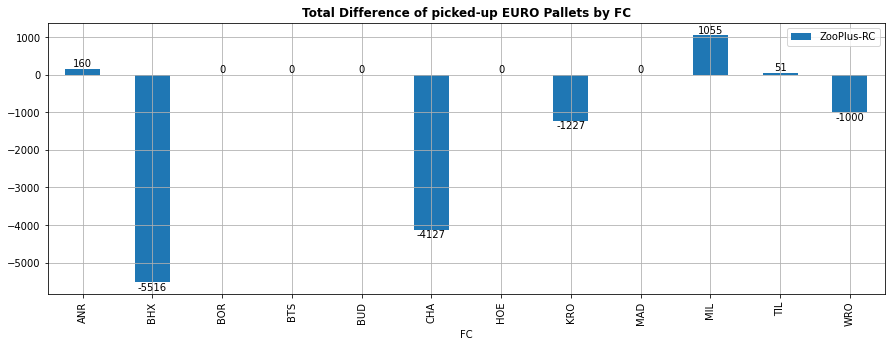

<Figure size 432x288 with 0 Axes>

In [48]:
grouped=merged.groupby('FC')[['Euro pallet out','EPAL Collected']].sum().reset_index()
grouped['Difference']=grouped['Euro pallet out']-grouped['EPAL Collected']

ax=grouped.plot(kind='bar',x='FC',y='Difference',figsize=(15,5))
plt.legend(['ZooPlus-RC'])
plt.title('Total Difference of picked-up EURO Pallets by FC',fontweight='bold')
plt.bar_label(ax.containers[0])
plt.grid(axis='both')
plt.savefig('Total Difference of picked-up EURO Pallets by FC.pdf')
plt.show()
plt.savefig('Total Diference picked-up')


In [49]:
grouped=merged.groupby(['Month','month_num'])[['Euro pallet out','EPAL Collected']].sum().reset_index().sort_values('month_num')
grouped['Difference']=grouped['Euro pallet out']-grouped['EPAL Collected']
grouped['Cumulative Difference']=grouped['Difference'].cumsum()

# Euro pallet in 

In [50]:
grouped1=df_zooplus.groupby(['Month','FC'])[['Euro pallet in','Pallet damage']].sum().reset_index()
grouped2=df_RC_in.groupby(['Month','Z+ Fulfillment Center'])['Pallets delivered'].sum().reset_index()

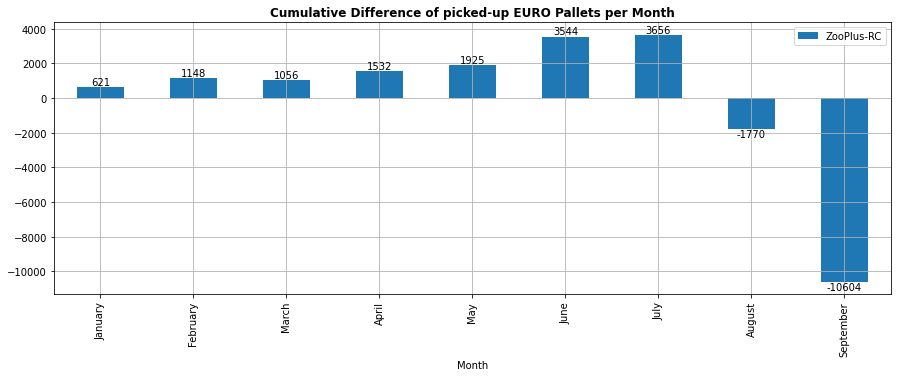

In [53]:
merged=grouped1.merge(grouped2,how='outer',left_on=['Month','FC'],right_on=['Month','Z+ Fulfillment Center'])


ax=grouped.plot(kind='bar',x='Month',y='Cumulative Difference',figsize=(15,5))
plt.legend(['ZooPlus-RC'])
plt.title('Cumulative Difference of picked-up EURO Pallets per Month',fontweight='bold')
plt.bar_label(ax.containers[0])
plt.grid(axis='both')
plt.savefig('Total Difference of picked-up EURO Pallets by Month.pdf')
plt.show()

In [35]:
merged

,Month,FC,Euro pallet in,Pallet damage,Z+ Fulfillment Center,Pallets delivered
0,April,ANR,3364.0,198.0,ANR,3211.166667
1,April,BHX,2227.0,0.0,BHX,2067.000000
2,April,BUD,947.0,10.0,BUD,958.000000
3,April,CHA,2724.0,0.0,CHA,2720.283730
4,April,HOE,1461.0,7.0,HOE,1471.613095
...,...,...,...,...,...,...
91,September,MIL,1307.0,6.0,MIL,1238.611111
92,September,TIL,2051.0,4.0,TIL,2094.400000
93,September,WRO,3739.0,278.0,WRO,4021.192063
94,August,NaN,NaN,NaN,BRA,1951.888889


In [16]:
month_num=[]
for i in merged['Month']:
    if i=="January":
        month_num.append(1)
    elif i=="February":
        month_num.append(2)
    elif i=="March":
        month_num.append(3)
    elif i=="April":
        month_num.append(4)
    elif i=="May":
        month_num.append(5)
    elif i=="June":
        month_num.append(6)
    elif i=="July":
        month_num.append(7)
    elif i=="August":
        month_num.append(8)
    elif i=='September':
        month_num.append(9)
    else:
        None
merged['month_num']=month_num


In [17]:
merged=merged.sort_values('month_num')

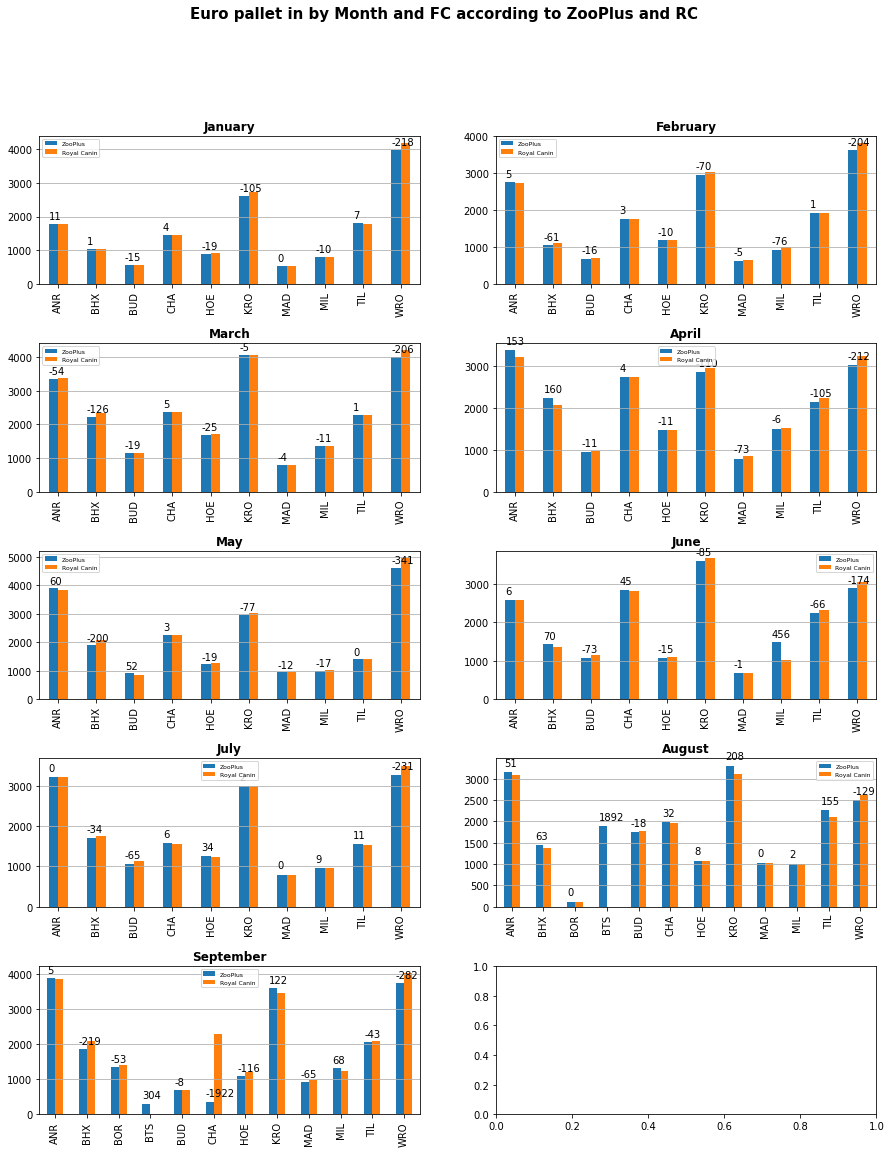

In [18]:
def value_labels(x,y):
    for i in range(len(y)):
        ax.text(i-0.25,x.iloc[i],y.iloc[i])


months=merged['Month'].unique()
fig,axes=plt.subplots(5,2,figsize=(15,18))
for ax,month in zip(axes.ravel(),months):
    grouped=merged.query('Month==@month').groupby('FC')[['Euro pallet in','Pallet damage','Pallets delivered']].sum().reset_index()
    grouped['in+damage']=grouped['Euro pallet in']+grouped['Pallet damage']
    grouped.plot(ax=ax,kind='bar',x='FC',y=['Euro pallet in','Pallets delivered'],xlabel='',fontsize=10)
    ax.set_title(month,fontweight='bold')
    ax.grid(axis='y')
    ax.legend(['ZooPlus','Royal Canin','in+damage'],fontsize=6)
    
    grouped['Difference']=grouped['Euro pallet in']-grouped['Pallets delivered']
    grouped['Difference']=grouped['Difference'].round().astype(int)
    value_labels(grouped['Euro pallet in']+150,grouped['Difference'])

plt.suptitle('Euro pallet in by Month and FC according to ZooPlus and RC',size=15,fontweight='bold')
plt.subplots_adjust(hspace=0.4)

plt.show()
fig.savefig('full_plot_in.pdf')